# 最短経路探索

最短経路を探索します。

networkxの読み込み

In [1]:
import networkx as nx

その他ライブラリ

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

## ネットワークの読み込みと描画
エッジリスト形式のネットワークデータを読み込む

大腸菌の代謝ネットワークの一部（解糖系・糖新生とTCA回路）を例にします。

* ``../data/eco_EM+TCA.txt``
* [KEGGデータベース](https://www.kegg.jp)
* Kanehisa M, Sato Y, Furumichi M, Morishima K, Tanabe M (2019) New approach for understanding genome variations in KEGG. Nucleic Acids Res., 47, pp. D590–D595. [https://doi.org/10.1093/nar/gky962](https://doi.org/10.1093/nar/gky962])

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/kztakemoto/network-analysis-in-biology/refs/heads/main/data/eco_EM%2BTCA.txt", sep='\s+', header=None)

グラフオブジェクトに変換

In [4]:
# グラフオブジェクトの作成
g = nx.from_pandas_edgelist(df,
                           source=df.columns[0],  # 最初の列をsourceとして使用
                           target=df.columns[1],  # 2番目の列をtargetとして使用
                           create_using=nx.DiGraph())  # 有向グラフとして作成

# 多重エッジと自己ループの削除（必須でない）
g = nx.DiGraph(g)  # 多重エッジを自動的に削除
g.remove_edges_from(nx.selfloop_edges(g))  # 自己ループを削除

## 最短経路探索
全部の最短経路を計算する。

In [5]:
# 全最短経路を取得
paths = list(nx.all_shortest_paths(g,
                                 source="D-Glucose",
                                 target="2-Oxoglutarate",
                                 method="dijkstra"))

最短経路を表示

In [6]:
for i, path in enumerate(paths, 1):
    print(f"Path {i}:", ' -> '.join(path))

Path 1: D-Glucose -> G6P -> F6P -> F16BP -> GAP -> BPG -> 3PG -> 2PG -> PEP -> Pyruvate -> Acetyl-CoA -> Citrate -> cis-Aconitate -> Isocitrate -> Oxalosuccinate -> 2-Oxoglutarate


最短経路を描画

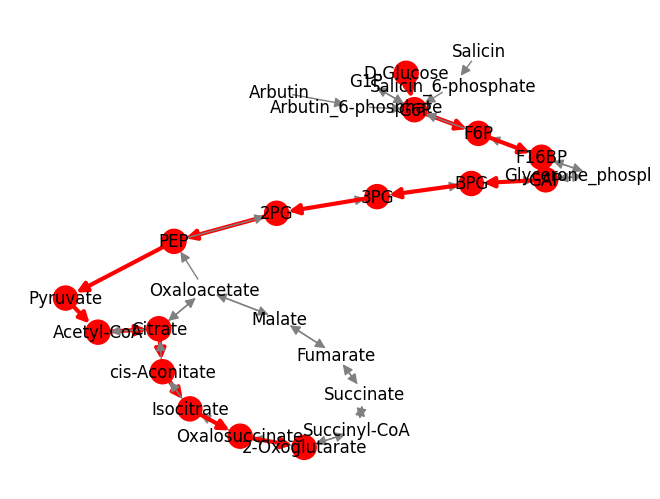

In [7]:
# 最初のパスだけを使う
first_path = paths[0]

# 乱数シードの設定
np.random.seed(40)
# 描画
nx.draw(g,
        node_color=['red' if node in first_path else 'white' for node in g.nodes()],
        edge_color=['red' if (u,v) in zip(first_path, first_path[1:]) else 'grey' for u,v in g.edges()],
        width=[3 if (u,v) in zip(first_path, first_path[1:]) else 1 for u,v in g.edges()],
        arrowsize=15,
        with_labels=True)

## やってみよう
* 始点と終点を変更して，最短経路を見つけてみよう。
* 別の生物ネットワークの最短経路を探索してみよう（``data``に様々ある）。
* Notebookを参考に自分のネットワークデータを解析してみよう。